# DIABETES PREDICTION MODEL

The model below is used to predict whether an induividual has diabetes or not, given 8 features. 

Tha datasets provided has 8 features and one label. I will perform the following activities in the process of developing the predictive model:
* Load the datasets. The datasets are stored in my local machine.
* Perform some Exploratory Data Analysis to the data. This will involve:
    - Univariate EDA
    - Bivariate EDA

* Some feature emgineering. For this exercise, I will not perform any feature selectiion.
* Finally, I will train the model using several classifiers including:
    - RandomForestClassifier
    - AdaBoostClassifier
    - SVC
    - CatBoostClassifier
    - XGBClassifier ...


# ***1. Importing the necessary Libraries***

In [1]:
# Importing the libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

#importing the classifiers.

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


# ***2. Loading the Dataset.***

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.shape

(100000, 9)

The datasets has 100000 rows and 9 columns.

# ***3. Exploratory Data Analysis(EDA)***
## (a) Univariate EDA

In [4]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
# Checking for duplicates.
df.duplicated().sum()

3854

3854 rows are duplicated. This raises the need to drop them, using the code snippet below.

In [6]:
# Checking for duplicates.

df = df.drop_duplicates()

df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


The dataset has numerical and categorical columns. The categorical columns will be converted to numerical format later in the exercise.

<AxesSubplot: xlabel='gender', ylabel='count'>

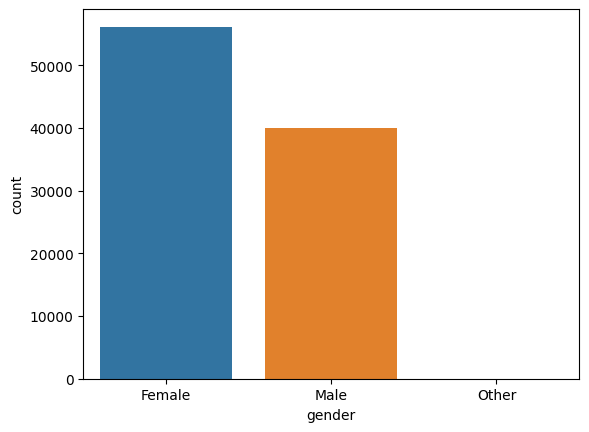

In [8]:
sns.countplot(x= df.gender)

More females than males were interviewd. The 'Other' gender contained the least people. Due to their small number, I considered dropping all rows with this gender.

In [9]:
df.drop(df[df['gender']=='Other'].index, inplace=True)

<AxesSubplot: xlabel='hypertension', ylabel='count'>

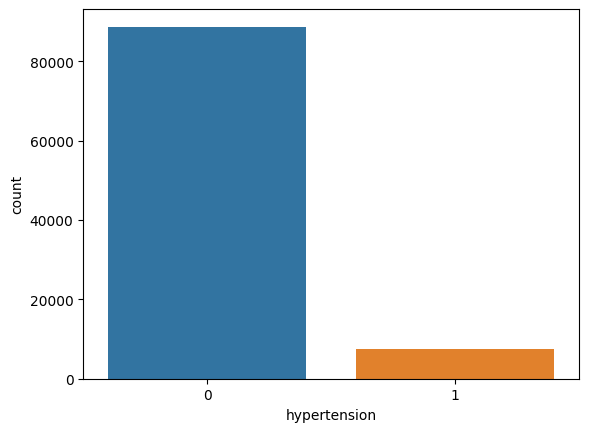

In [10]:
sns.countplot(df, x = 'hypertension')

The hypertension column is highly imbalanced. The same is the case to heart_disease and diabetes columns.

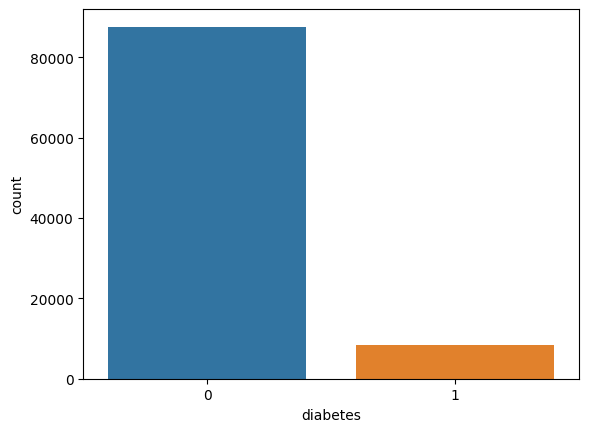

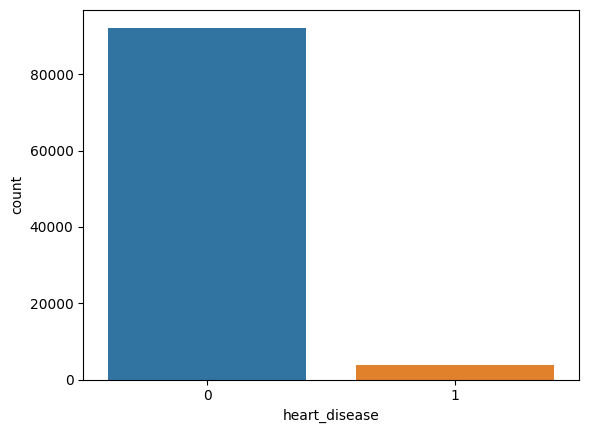

In [11]:
sns.countplot(df, x = 'diabetes')
plt.show()

sns.countplot(df, x = 'heart_disease')
plt.show()

The imbalance in the target column may be problematic as this will result in the model predicting the ***diabetic*** column poorly. This calls for the need to balance the dataset.

From the above observations, I concluded that the following actions might be neccessary before developing the predictive model:
* Balancing the imbalanced columns by:
    * Requesting for more data with people suffering from diabetes, hypertension and heart_disease.
    * Using inbuilt functions to balance the datasets.

However, I will not perform any of the above but will do so in the next exercise.

## (b) Bivariate EDA.

In this section, I will compare different features with the diabetes column and try to draw insights from the data.

People with hypertension seem to be at a higher risk of suffering from diabetes.

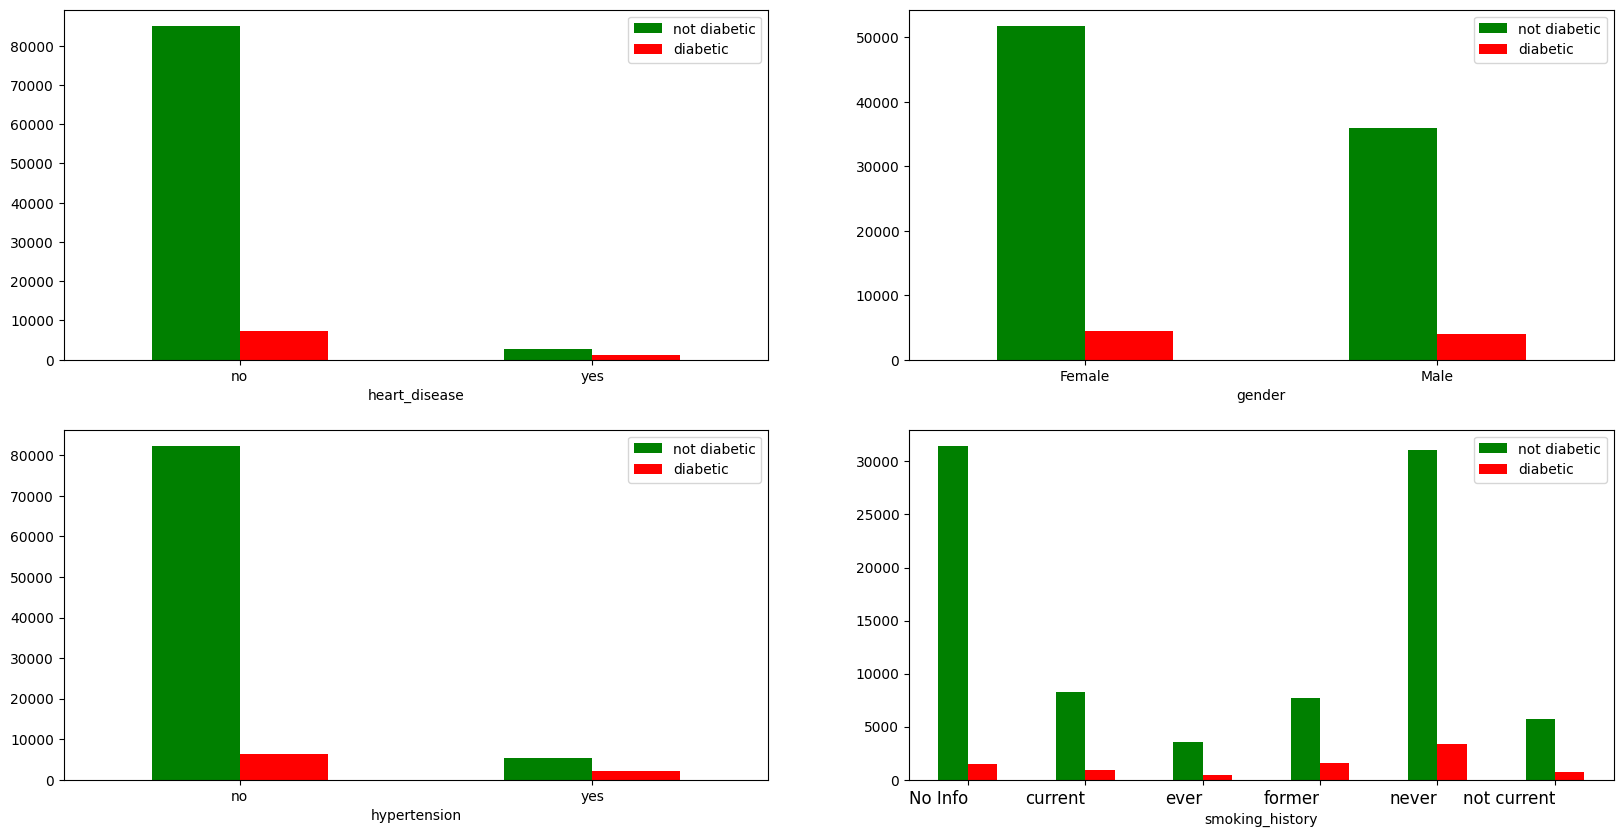

In [12]:
# Using subplots to plot the remaining piece of information.

ct1 = pd.crosstab(df['heart_disease'], df['diabetes'])
ct2 = pd.crosstab(df['gender'], df['diabetes'])
ct3 = pd.crosstab(df['hypertension'], df['diabetes'])
ct4 = pd.crosstab(df['smoking_history'], df['diabetes'])

# setting the colors
colors = ['green', 'red']

fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(ncols=2,
                                           nrows=2,
                                           figsize=(20,10))

plt.xticks(rotation=60,
           fontsize='large',
           horizontalalignment='right',
           fontweight='light')


ct1.plot(kind='bar', ax=ax1, color=colors, rot=0)
ct2.plot(kind='bar', ax=ax2, color=colors, rot=0)
ct3.plot(kind='bar', ax=ax3, color=colors, rot=0)
ct4.plot(kind='bar', ax=ax4, color=colors, rot=0)

# setting x_labels for hypertension and heart disease.
ax1.set_xticklabels(['no', 'yes'])
ax3.set_xticklabels(['no', 'yes'])

# changing the labels of the legend
ax1.legend(labels = ['not diabetic', 'diabetic'])
ax2.legend(labels = ['not diabetic', 'diabetic'])
ax3.legend(labels = ['not diabetic', 'diabetic'])
ax4.legend(labels = ['not diabetic', 'diabetic'])

From the above data visualization exercise, the following insights can be drawn:
* ***Former, current*** and ***not current*** smokers seem to be at a higher risk of being diabetic.
* People with ***hypertension*** and ***heart_disease*** seem to be at a higher risk of being diabetic.
* Males are at a higher risk of being diabetic.

The ***No Info***  in the ***smoking_history*** column indicates that the data was missing. This can be misleading as precise information should be provided to ensure efficient functioning of the predictive model.


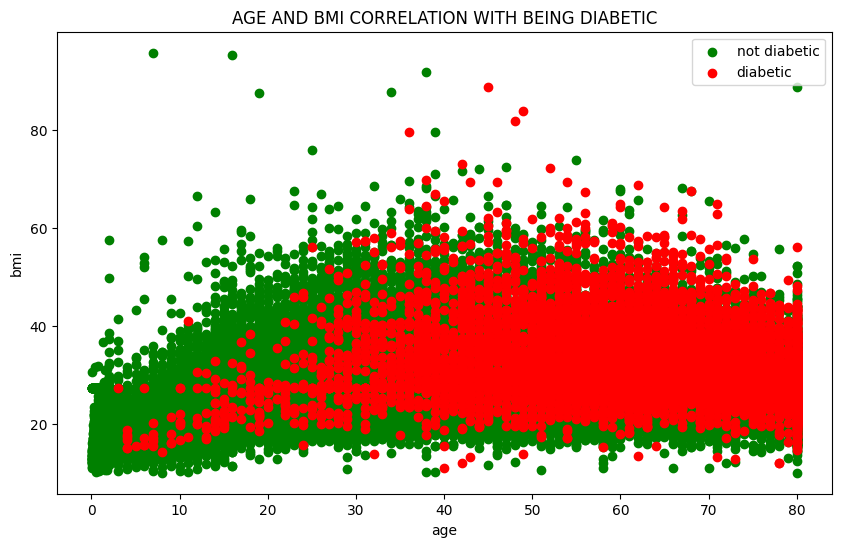

In [13]:
plt.figure(figsize=(10,6))

# age and BMI of people without diabetes.

plt.scatter(
    df.age[df.diabetes == 0],
    df.bmi[df.diabetes == 0],
    color='green'
)

# age and bmi of people who are diabetic

plt.scatter(df.age[df.diabetes == 1],
            df.bmi[df.diabetes ==1],
            color='red')

plt.title('AGE AND BMI CORRELATION WITH BEING DIABETIC')
plt.xlabel('age')
plt.ylabel('bmi')
plt.legend(['not diabetic', 'diabetic'])

* Age seems to be quite an indicator of one being diabetic. The following insight were made:
    * A large number of the diabetic people are older than 30 years. 
    * People with a bmi lower than 20 seem to be at lower risk of being diabetic.
    * The larger group of the individual had a bmi>15 and bmi<60
    * Most of the individuals <30 years old had a lower risk of being diabetic.
    * There seems to be some outliers in the bmi column. Further investigation will be done later.

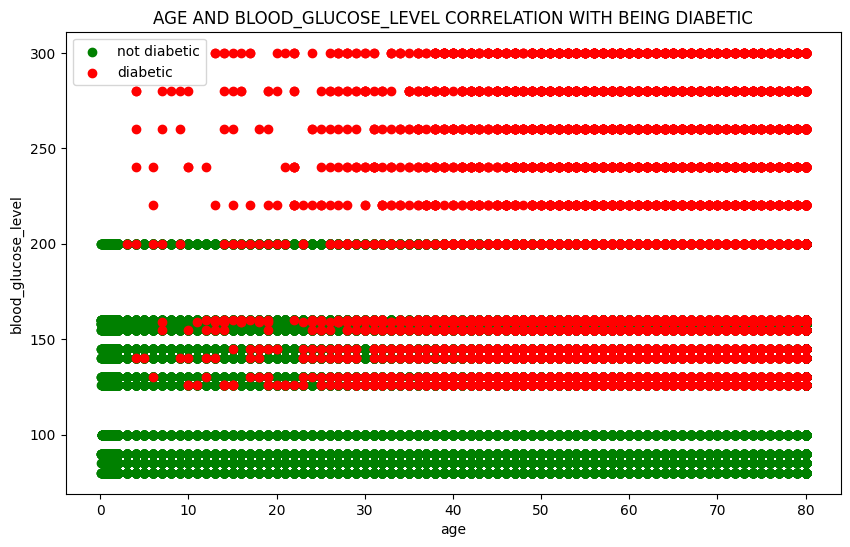

In [14]:
plt.figure(figsize=(10,6))

# age and blood glucose level of people without diabetes.

plt.scatter(
    df.age[df.diabetes == 0],
    df.blood_glucose_level[df.diabetes == 0],
    color='green'
)

# age and blood glucose level of diabetic individuals.

plt.scatter(
    df.age[df.diabetes == 1],
    df.blood_glucose_level[df.diabetes==1],
    color='red'
)

plt.title('AGE AND BLOOD_GLUCOSE_LEVEL CORRELATION WITH BEING DIABETIC')
plt.xlabel('age')
plt.ylabel('blood_glucose_level')
plt.legend(['not diabetic', 'diabetic'])

* Blood_glucose_level above 120 seem to be an indicator for having diabetes.
* For blood glucose level > 120 and < 200, the age of the individual seems to be an indicator whether someone has diabetes or not, with anyone being older than 35 years having a 100% chance of being diabetic. 
* Blood_glucose_level > 200 indicates a 100% chance of one suffering from diabetes, despite the age.

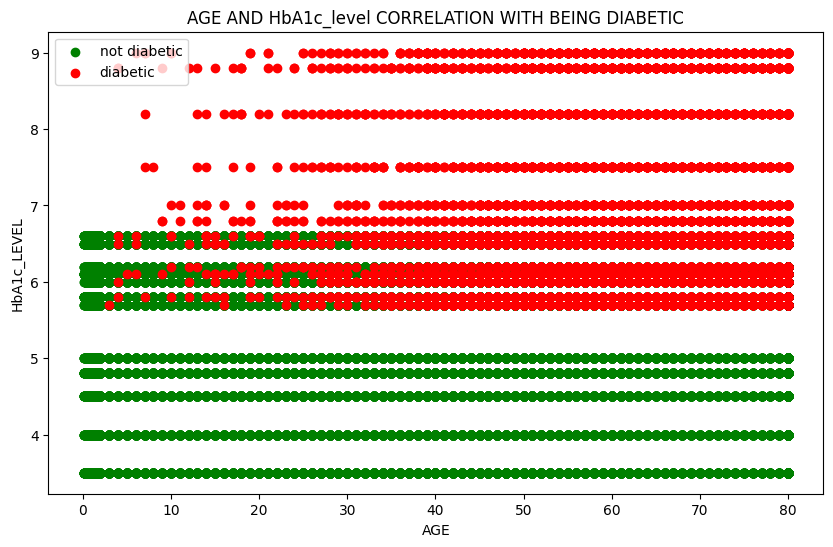

In [15]:
plt.figure(figsize=(10,6))

# age and HbA1c_level of people without diabetes

plt.scatter(
    df.age[df.diabetes==0],
    df.HbA1c_level[df.diabetes==0],
    color='green'
)
# age and HbA1c_level of diabetic individuals.
plt.scatter(
    df.age[df.diabetes==1],
    df.HbA1c_level[df.diabetes==1],
    color='red'
)

plt.title('AGE AND HbA1c_level CORRELATION WITH BEING DIABETIC')
plt.xlabel('AGE')
plt.ylabel('HbA1c_LEVEL')
plt.legend(['not diabetic', 'diabetic'])

* The HbA1c_level of an individual also seems to be an indicator if one is diabetic or not.
* Levels above 6.9 indicate a 100% chance of one being diabetic, despite the age while levels below 6.5 show a 100% chance of not being diabetic.
* Levels between 6.5 and 6.9 greatly depend on the age of the individual, where ages> 35 indicate a 100% chance of being diabetic while individual with younger age have a probability of either being diabetic or not.

For further analysis, I might compare the relationship between HbA1c_levels and blood_glucose_level with the chances of being diabetic.

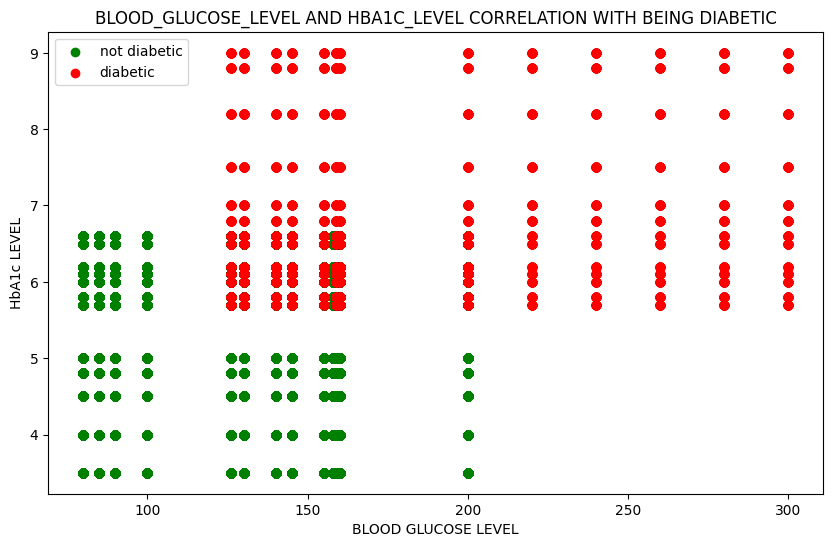

In [16]:
plt.figure(figsize=(10,6))

# HbA1c_levels and blood glucose levels of people without diabetes.

plt.scatter(
    df.blood_glucose_level[df.diabetes==0],
    df.HbA1c_level[df.diabetes == 0], 
    color='green'
)

#HbA1c_levels and blood_glucose_levels of people with diabetes

plt.scatter(
    df.blood_glucose_level[df.diabetes == 1],
    df.HbA1c_level[df.diabetes==1],
    color='red'
)

plt.title('BLOOD_GLUCOSE_LEVEL AND HBA1C_LEVEL CORRELATION WITH BEING DIABETIC')
plt.xlabel('BLOOD GLUCOSE LEVEL')
plt.ylabel('HbA1c LEVEL')
plt.legend(['not diabetic', 'diabetic'])

* HbA1c levels above 5.5 and blood glucose level above 120 indicate a 100% chance of being diabetic, though there might be a few exceptions where the individual may not be diabetic.
* Also, the exceptions may be a result of an error during data entry.

These two columns for a very important combination when it comes to the prediction of diabetes. As a result, in the next exercises where I will do some feature selection, these two columns must be included.

In an effort to understand the dataset even better, I decided to compare ***bmi*** with HbA1c_level and blood glucose level and try to gain some insight from these columns also.

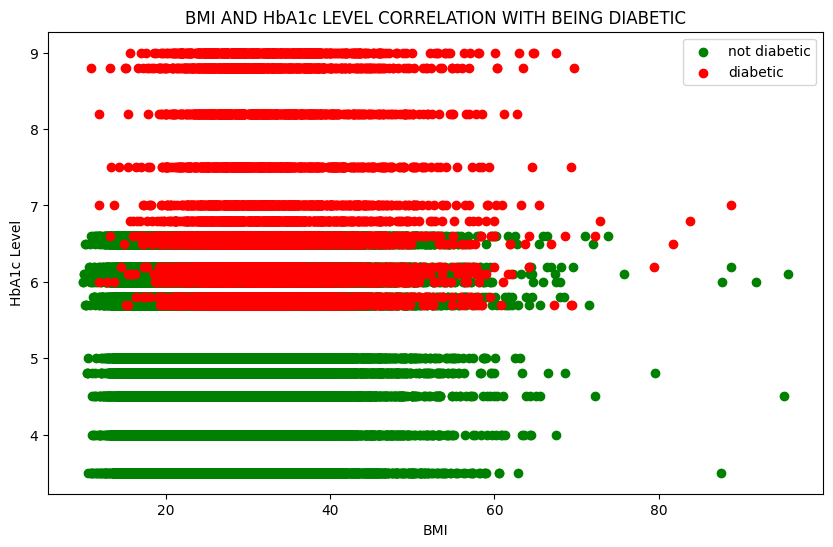

In [17]:
plt.figure(figsize=(10,6))

# bmi and HbA1c level of people without diabetes

plt.scatter(
    df.bmi[df.diabetes==0],
    df.HbA1c_level[df.diabetes==0],
    color='green'
)

# bmi and HbA1c_level of people with diabetes.

plt.scatter(
    df.bmi[df.diabetes==1],
    df.HbA1c_level[df.diabetes==1],
    color='red'
)

plt.title('BMI AND HbA1c LEVEL CORRELATION WITH BEING DIABETIC')
plt.xlabel('BMI')
plt.ylabel('HbA1c Level')
plt.legend(['not diabetic', 'diabetic'])

* There seems to be no clear relationship between these two columns.

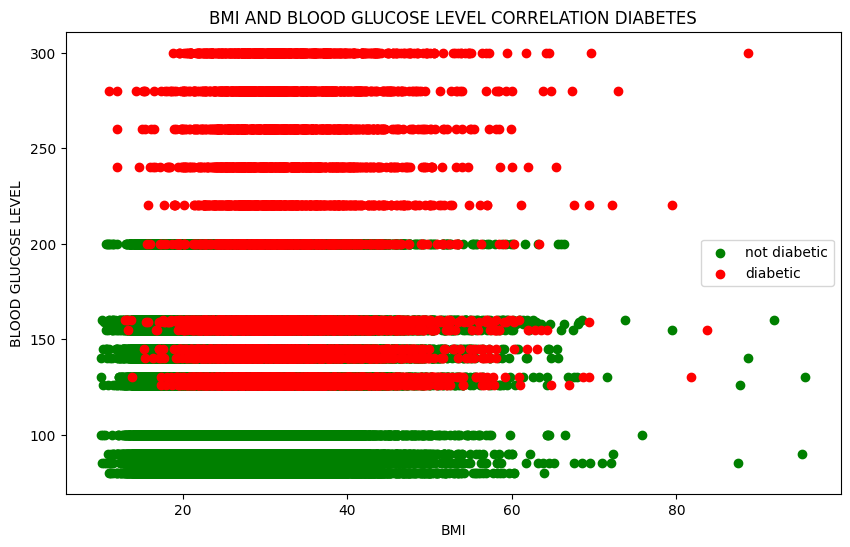

In [18]:
plt.figure(figsize=(10,6))

# bmi and blood glucose level of people without diabetes.

plt.scatter(
    df.bmi[df.diabetes==0],
    df.blood_glucose_level[df.diabetes==0],
    color='green'
)

#bmi and blood glucose level of those who are diabetic.

plt.scatter(
    df.bmi[df.diabetes==1],
    df.blood_glucose_level[df.diabetes==1],
    color='red'
)

plt.title('BMI AND BLOOD GLUCOSE LEVEL CORRELATION DIABETES')
plt.xlabel('BMI')
plt.ylabel('BLOOD GLUCOSE LEVEL')
plt.legend(['not diabetic', 'diabetic'])

The relationship between these two columns is also unclear.

After the above EDA, so far I have come to the following conclusion:
* HbA1c level and blood glucose level play a large role in the determination whether one is diabetic or not.
* Age also can be an indicator whether one is diabetic or not, though to a smaller extent. Younger people below the age of 30 years seem to have a lower risk of being diabetic, compared to indindividuals above this age.
* The overall effect of ***bmi*** to one being diabetic is minimal, thus in future feature selection, this column may be dropped.

## (c) Checking for correlation.

In [19]:
# converting categorical columns into numerical format.
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])

data1 = pd.get_dummies(df['smoking_history'], prefix_sep='_')\
                        .join(df['HbA1c_level'])\
                        .join(df['age'])\
                        .join(df['blood_glucose_level'])\
                        .join(df['bmi'])\
                        .join(df['gender'])\
                        .join(df['heart_disease'])\
                        .join(df['hypertension'])\
                        .join(df['diabetes'])

In [20]:
data1.head()

,No Info,current,ever,former,never,not current,HbA1c_level,age,blood_glucose_level,bmi,gender,heart_disease,hypertension,diabetes
0,0,0,0,0,1,0,6.6,80.0,140,25.19,0,1,0,0
1,1,0,0,0,0,0,6.6,54.0,80,27.32,0,0,0,0
2,0,0,0,0,1,0,5.7,28.0,158,27.32,1,0,0,0
3,0,1,0,0,0,0,5.0,36.0,155,23.45,0,0,0,0
4,0,1,0,0,0,0,4.8,76.0,155,20.14,1,1,1,0


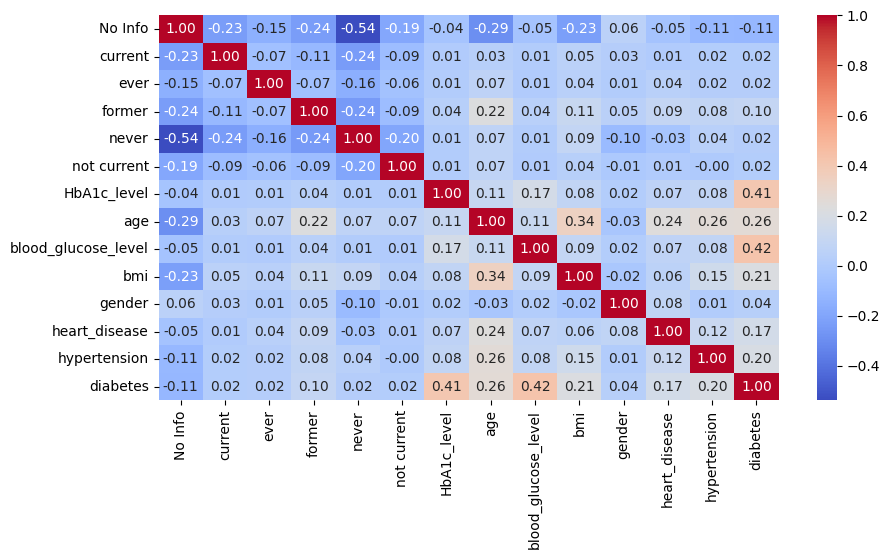

In [21]:
# plotting a correlation matrix

corr_matrix = data1.corr()

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt='.2f',
                 cmap='coolwarm')

The diabetes column has:
* High correlation with the following columns:
    *  blood_glucose_level, HbA1c_level, age, bmi, hypertension and heart_disease.

* There is extremely low correlation with the following columns:
    * gender, current, ever, never, not current, finally former and No Info.

In the feature selection process, I've decided to drop the following columns:
1. gender
2. not current
3. never
4. No Info

However, I will drop the columns in a later exercise in a separate notebook.

# ***4. Feature Engineering***

For this exercise, I will only perform Normalization, using StandardScaler.

In [22]:
# separating the features from the labels.

X = data1.drop(['diabetes'], axis=1)
y = data1['diabetes']

# using StandardScaler for normalization.

scaler = StandardScaler()
X = scaler.fit_transform(X)

# ***5. Training the Model***

In [23]:
# splitting datasets into training and testing sets. For this model, 50% of the data will be used for training and the rest for model evaluation.

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3, random_state=42, stratify=y)

In [24]:
knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'The accuracy of the predictive model using KNeighboursClassifier is {accuracy*100}%')
print(classification_report(y_test,y_pred))

The accuracy of the predictive model using KNeighboursClassifier is 95.63085153811859%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     61353
           1       0.92      0.55      0.69      5937

    accuracy                           0.96     67290
   macro avg       0.94      0.77      0.83     67290
weighted avg       0.95      0.96      0.95     67290



From the model above, it os evident that the model predicted ***no diabetes*** class better than the ***diabetes*** class. This might have resulted from the imbalance in the dataset. In an effort to handle this, handling of this imbalance have been done in the next notebook.

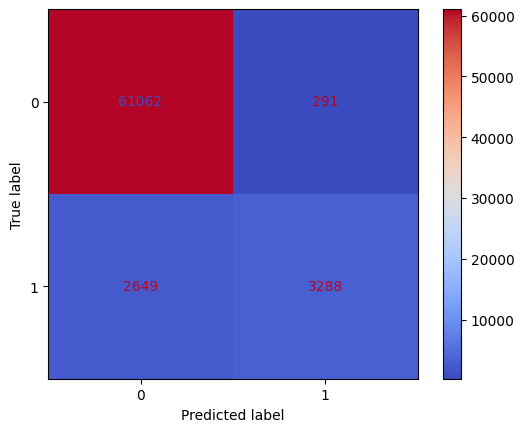

In [25]:
# plotting a confusin matrix 
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='coolwarm')

In [26]:
c = 10

classifiers = {
    # applying linear svc in the model prediction.
    'Linear SVC': SVC(kernel='linear', C=c, probability=True, random_state=0 ),
    # applying KNeighboursClassifier.
    'KNN Classifier': KNeighborsClassifier(n_neighbors=4),
    # applying Support-Vector Machine
    'SVC': SVC(),
    # applying AdaBoostClassifier
    'ADA': AdaBoostClassifier(n_estimators=100),
    #applying RandomForestClassifier
    'RFST': RandomForestClassifier(n_estimators=100),
    # applying XGBClassifier
    'XGBClassifier':XGBClassifier(min_child_weight=1, gamma=1, subsample=0.8, max_depth=5),
    #Using CatBoostClassifier()
    'CATBOOST CLASSIFIER':CatBoostClassifier() 

}


for index,(name, classifier) in enumerate(classifiers.items()):
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print('Accuracy (train) for %s: %0.1f%%' % (name, accuracy*100))
    print(classification_report(y_test, y_pred))

Accuracy (train) for Linear SVC: 96.0%
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     61353
           1       0.91      0.61      0.73      5937

    accuracy                           0.96     67290
   macro avg       0.94      0.80      0.85     67290
weighted avg       0.96      0.96      0.96     67290

Accuracy (train) for KNN Classifier: 95.6%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     61353
           1       0.92      0.55      0.69      5937

    accuracy                           0.96     67290
   macro avg       0.94      0.77      0.83     67290
weighted avg       0.95      0.96      0.95     67290

Accuracy (train) for SVC: 96.1%
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     61353
           1       0.96      0.58      0.73      5937

    accuracy                           0.96     67290
   macro avg  

In [27]:
data1.to_csv('data.csv', index=False)